In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

In [2]:
# import imgaug as ia
# from imgaug import augmenters as iaa

In [3]:
import pandas as pd
import os
import sys
from datetime import datetime
import time
from pprint import pprint

In [4]:
# attention! Change according to environment, if local machine set to False
am_I_using_colab = False

In [5]:
# if am_I_using_colab:
#     !pip install -U tensorflow-addons
    
# import tensorflow_addons as tfa
# import tqdm

In [6]:
# plt.ioff()  # interactive mode off
# plt.ion()  # interactive mode on

# %pylab inline

np.random.seed(1728)
# ia.random.seed(1728)

In [7]:
if am_I_using_colab:
    ###
    from google.colab import drive
    drive.mount('/content/drive')

    print(os.getcwd())
    print(os.listdir())

    ###
    temp_dir = '/content/temp'
    try:
        os.mkdir(temp_dir)
    except:
        pass
    print(os.listdir(temp_dir))

    ###
    dataset_filepath = f'{temp_dir:s}/dataset_v1.7z'
    import gdown
    gdown.download(
        r'https://drive.google.com/uc?id=15kAUrJvaJy54xoXIwPZqtkBQGccjOR5k',
        output=dataset_filepath,
        quiet=False,
        )

    ###
    !pip install py7zr
    import py7zr
    with py7zr.SevenZipFile(dataset_filepath, 'r') as archive:
        archive.extractall(path="./dataset_v1")

    ###


In [8]:
import time

def mulai_hitung_waktu():
    global waktu_mulai
    waktu_mulai = time.time()

def cetak_lama_waktu():
    global waktu_mulai
    hasil_detik = abs(waktu_mulai - time.time())
    hasil_milidetik = hasil_detik * 1000
    
    menit = hasil_detik / 60
    detik = hasil_detik % 60
    
    menit_detik = str(int(menit)) + 'm' + ':' + str(int(detik)) + 's'
    
    print('-----\n(%.2f ms) == (%s)\n-----' % (hasil_milidetik, menit_detik))
    del waktu_mulai


# cara pakai
# ----------
mulai_hitung_waktu()  ###

time.sleep(100/1000)  # time-consuming computing here

cetak_lama_waktu()  ###

-----
(105.01 ms) == (0m:0s)
-----


In [9]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print("Num GPUs Available: %d Physical GPUs, %d Logical GPU" % (len(gpus), len(logical_gpus)))
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

Num GPUs Available: 1 Physical GPUs, 1 Logical GPU


In [10]:
if am_I_using_colab:
    WORK_DIR = '/content'
    TRAIN_SET_PATH = f'{WORK_DIR}/dataset_v1'
    # TEST_SET_PATH = f''

    DRIVE_DIR = '/content/drive/MyDrive/MyNotebook/MySkripsi'
    CHECKPOINTS_DIR = f'{WORK_DIR}/checkpoints'
    FINAL_EPOCH_DIR = f'{WORK_DIR}/weights and models'

else:
    WORK_DIR = r'D:\OneDrive - leverage proactive deliverables\_OTHERS\MyNotebook\MySkripsi'
    TRAIN_SET_PATH = r'D:\MaskTheFace\datasets\_temp\_v1'
    TEST_SET_PATH = r'D:\MaskTheFace\datasets\_temp\_v1 - test only'

    CHECKPOINTS_DIR = fr'{WORK_DIR}/_checkpoints'
    FINAL_EPOCH_DIR = fr'{WORK_DIR}/_weights and models'

directories = [
    CHECKPOINTS_DIR,
    FINAL_EPOCH_DIR
]

def is_dir_error(directories):
    for _dir in directories:
        print(_dir)
        try:
            os.mkdir(_dir)
            print('success')
        except FileExistsError:
            print('!!! exist')
            continue
        except:
            print('~~~ error')
            return True
    print()
    return None


is_dir_error(directories)

# Set working directory
os.chdir(WORK_DIR)

print('current work dir:')
print(os.getcwd())
print()
print('listdir WORK_DIR:')
pprint(os.listdir('./'))

D:\OneDrive - leverage proactive deliverables\_OTHERS\MyNotebook\MySkripsi/_checkpoints
success
D:\OneDrive - leverage proactive deliverables\_OTHERS\MyNotebook\MySkripsi/_weights and models
success

current work dir:
D:\OneDrive - leverage proactive deliverables\_OTHERS\MyNotebook\MySkripsi

listdir WORK_DIR:
['.ipynb_checkpoints',
 '.~imgaug seed.ipynb',
 'bulk image resizing.ipynb',
 'imgaug seed.ipynb',
 'imgaug seed_edit.ipynb',
 'imgaug.ipynb',
 'imgaug.jupyterlab-workspace',
 'LeNet-5.ipynb',
 'MobileNetV2.ipynb',
 'MobileNetV2_drive.ipynb',
 'MobileNetV2_drive_consecutive.ipynb',
 'model.png',
 'Testing the Model -d -c.ipynb',
 '_checkpoints',
 '_weights and models']


In [11]:
names = os.listdir(TRAIN_SET_PATH)

length_dict = {}
for name in names:
    samples = f'{TRAIN_SET_PATH:s}/{name:s}'
    length_dict[name] = len(os.listdir(samples))

n_min = min(length_dict.values())
n_max = max(length_dict.values())
n_sum = sum(length_dict.values())

print(f'{len(names):d} names')
display(length_dict)
print(f"max: {n_min:d}")
print(f"min: {n_max:d}")
print(f"total: {n_sum:d}")

# del n_min, n_max, n_sum, length_dict

12 names


{'Andhika': 1260,
 'Ardiyan': 1260,
 'Artik': 1260,
 'Ballya': 1260,
 'Bina': 1260,
 'Buyung': 1260,
 'Kresna': 1260,
 'Mhartian': 1260,
 'RaihanA': 1260,
 'Syifa': 1260,
 'Taufik': 1260,
 'Yandi': 1260}

max: 1260
min: 1260
total: 15120


In [12]:
validation_split = 0.4
total_train = round(n_sum * (1 - validation_split))
total_val = n_sum - total_train

print(f'train images: {total_train:d}')
print(f'validation images: {total_val:d}')

train images: 9072
validation images: 6048


In [13]:
def do_rsync():
    if am_I_using_colab:
        !rsync -aruvzh --no-inc-recursive --info=progress2 "/content/checkpoints" "/content/drive/MyDrive/MyNotebook/MySkripsi"
        print()
        !rsync -aruvzh --no-inc-recursive --info=progress2 "/content/weights and models" "/content/drive/MyDrive/MyNotebook/MySkripsi"
    else:
        !rsync -aruvzh --no-inc-recursive --info=progress2 "./_checkpoints" "/cygdrive/d/MaskTheFace/datasets/_temp"
        print()
        !rsync -aruvzh --no-inc-recursive --info=progress2 "./_weights and models" "/cygdrive/d/MaskTheFace/datasets/_temp"
    print()
    print('rsync operation completed')
    print()

In [14]:
def new_lenet5_actual(input_size=32, batch_size=32, activation='tanh', pooling='average'):
    # argument validation
    if activation in ['tanh', 'relu'] and pooling in ['average', 'max']:
        pass
    else:
        raise ValueError
        
    inputs = keras.Input(shape=(input_size, input_size, 3), name='input')
    
    x = keras.layers.Conv2D(6, kernel_size=(5,5), strides=1, activation=activation, padding='valid', name='C1')(inputs)  # 1st
    x = keras.layers.AveragePooling2D(name='S2')(x) if pooling=='average' else keras.layers.MaxPooling2D(name='S2')(x)   # 2nd
    
    x = keras.layers.Conv2D(16, kernel_size=(5,5), strides=1, activation=activation, padding='valid', name='C3')(x)      # 3rd
    x = keras.layers.AveragePooling2D(name='S4')(x) if pooling=='average' else keras.layers.MaxPooling2D(name='S4')(x)   # 4th

    x = keras.layers.Flatten(name='flatten')(x)
    x = keras.layers.Dense(120, activation=activation, name='C5')(x)  # 5th
    x = keras.layers.Dense(84, activation=activation, name='F6')(x)   # 6th
    outputs = keras.layers.Dense(12, activation='softmax', name='OUTPUT')(x)  # 7th
        
    name = f'lenet5_actual_'
    name = f'{name}t' if activation=='tanh' else f'{name}r'
    name = f'{name}a' if pooling=='average' else f'{name}m'
    name = f'{name}-{input_size:d}-{batch_size}'
    
    model = keras.Model(inputs=inputs, outputs=outputs, name=name)
    
    return model

Model: "lenet5_actual_rm-32-32"
__________________________________________________________________________________________
Layer (type)                                          Output Shape           Param #  
input (InputLayer)                                    [(None, 32, 32, 3)]    0        
__________________________________________________________________________________________
C1 (Conv2D)                                           (None, 28, 28, 6)      456      
__________________________________________________________________________________________
S2 (MaxPooling2D)                                     (None, 14, 14, 6)      0        
__________________________________________________________________________________________
C3 (Conv2D)                                           (None, 10, 10, 16)     2416     
__________________________________________________________________________________________
S4 (MaxPooling2D)                                     (None, 5, 5, 16)       0

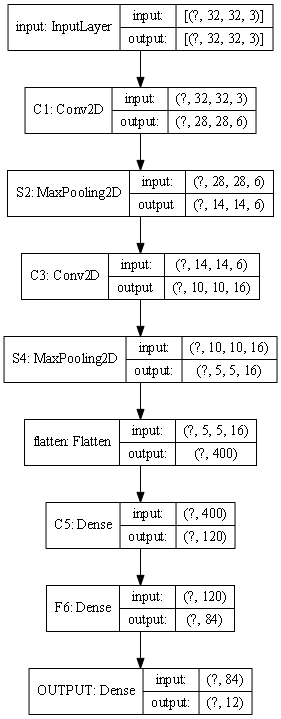

In [15]:
test = new_lenet5_actual(input_size=32, batch_size=32, activation='relu', pooling='max')
test.summary(line_length=90, positions=[.60, .86, .96, 1.])

model_viz = tf.keras.utils.plot_model(
    test,
    # to_file=saved_model_name + '.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',  # 'TB' (top-bottom)  'LR' (left-right)
    expand_nested=True,
    dpi=72
    )

display(model_viz)

del test, model_viz

In [16]:
def consecutiveModelTraining(
    input_size,  # [32, 64, 96, 128] or divisible by 32
    batch_size,  # [16, 32, 64] or power of 2
    activation,  # ['tanh', 'relu']
    pooling):    # ['average', 'max']
    
    
    ### create train/val generator
    image_generator = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        width_shift_range=1.05,
        height_shift_range=1.05,
        brightness_range=(0.75, 1.25),
        shear_range = 0.075,
        zoom_range=0.2,
        fill_mode = 'nearest',
        horizontal_flip=True,
        # vertical_flip=True,
        validation_split=validation_split,
        # preprocessing_function=seq.augment_image
    )
    train_data_gen = image_generator.flow_from_directory(
        seed=1728,
        subset='training',
        batch_size=batch_size,
        directory=TRAIN_SET_PATH,
        shuffle=True,
        target_size=(input_size, input_size),
        interpolation='bicubic',
        class_mode='categorical')

    val_data_gen = image_generator.flow_from_directory(
        seed=1728,
        subset='validation',
        batch_size=batch_size,
        directory=TRAIN_SET_PATH,
        shuffle=True,
        target_size=(input_size, input_size),
        interpolation='bicubic',
        class_mode='categorical')
    
    
    ### create model
    model = new_lenet5_actual(input_size=input_size, batch_size=batch_size, activation=activation, pooling=pooling)
    print()
    print()
    
    ### create save dir for model callbacks and post-train
    dir1 = f'{CHECKPOINTS_DIR}/{model.name}'
    dir2 = f'{FINAL_EPOCH_DIR}/{model.name}'
    if is_dir_error([dir1, dir2]):
        return
    

    ### model optimizer, loss fn, metrics
    # Optimizer's scheduler: ExponentialDecay
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-2,
        decay_steps=10000,
        decay_rate=0.9)
    
    optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
    loss_fn = 'categorical_crossentropy'
    metrics=[
        'categorical_accuracy',
        keras.metrics.TopKCategoricalAccuracy(k=3, name='top-3'),
        keras.metrics.AUC(name='ROC-AUC', curve='ROC'),
        keras.metrics.AUC(name='PR-AUC', curve='PR'),
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.TruePositives(name='TP'),
        keras.metrics.TrueNegatives(name='TN'),
        keras.metrics.FalsePositives(name='FP'),
        keras.metrics.FalseNegatives(name='FN'),]

    model.compile(
        optimizer=optimizer,
        loss=loss_fn,
        metrics=metrics)
    
    model.summary(line_length=90, positions=[.60, .86, .96, 1.])
    print()
    print()
    
    
    ###
    params = {
        'total_train' : total_train,
        'total_val' : total_val,
        'batch_size' : batch_size,
        'steps_per_epoch' : total_train//batch_size,
        'validation_steps' : total_val//batch_size,
        'epochs' : epochs}

    pprint(params)
    print()
    print()
    
    
    ### model callbacks save dir
    if am_I_using_colab:
        epoch5_filepath = '%s/%s/%s.weights.{epoch:03d}.hdf5' % (CHECKPOINTS_DIR, model.name, model.name)
        monitor_filepath = '%s/%s/%s.weights.{epoch:03d}_{val_categorical_accuracy:.4f}_{val_loss:.4f}.hdf5' % (CHECKPOINTS_DIR, model.name, model.name)
        tensorboard_dir = '%s/%s/%s.tensorboard' % (CHECKPOINTS_DIR, model.name, model.name)
    else:
        epoch5_filepath = '%s/%s/%s.weights.{epoch:03d}.hdf5' % (CHECKPOINTS_DIR, model.name, model.name)
        monitor_filepath = '%s/%s/%s.weights.{epoch:03d}_{val_categorical_accuracy:.4f}_{val_loss:.4f}.hdf5' % (CHECKPOINTS_DIR, model.name, model.name)
        tensorboard_dir = '%s/%s/%s.tensorboard' % (CHECKPOINTS_DIR, model.name, model.name)

    # Model's callback: ModelCheckpoint
    epoch_checkpoint = keras.callbacks.ModelCheckpoint(
        filepath=epoch5_filepath,
        monitor='val_loss',
        save_weights_only=True,
        save_freq=int(5 * params['steps_per_epoch'])
        )

    acc_checkpoint = keras.callbacks.ModelCheckpoint(
        filepath=monitor_filepath,
        monitor='val_categorical_accuracy',
        # verbose=1,
        save_best_only=True,
        mode='auto',
        save_weights_only=True,
        save_freq='epoch'
        )

    loss_checkpoint = keras.callbacks.ModelCheckpoint(
        filepath=monitor_filepath,
        monitor='val_loss',
        # verbose=1,
        save_best_only=True,
        mode='auto',
        save_weights_only=True,
        save_freq='epoch'
        )

    # initialize tqdm callback with default parameters
    # tqdm_callback = tfa.callbacks.TQDMProgressBar(
    #     metrics_separator=', '
    #     )

    tensorboard_callback = keras.callbacks.TensorBoard(
        log_dir=tensorboard_dir,
        write_graph=True,
        write_images=True
        )

    callbacks = [
        epoch_checkpoint,
        acc_checkpoint,
        loss_checkpoint,
        # tqdm_callback,
        tensorboard_callback
        ]
    
    
    ### model.fit() verbosity
    if am_I_using_colab:
        verbosity = 2  # end of epoch
    else:
        verbosity = 1  # every step in epoch
        
        
    ### model.fit()
    print(model.name)
    mulai_hitung_waktu()  ###

    training_history = model.fit(
        train_data_gen,
        shuffle=True,
        verbose=verbosity,  # 0 nope, 1 realtime, 2 epoch end
        steps_per_epoch=total_train // batch_size,
        epochs=epochs,
        validation_data=val_data_gen,
        validation_steps=total_val // batch_size,
        callbacks=callbacks,
        workers=0
        )

    cetak_lama_waktu()  ###
    print()
    print()
    
    
    ### post-train save
    history_df = pd.DataFrame(training_history.history)

    history_savepath = f'{FINAL_EPOCH_DIR}/{model.name}/history.{model.name}.csv'
    weights_savepath = f'{FINAL_EPOCH_DIR}/{model.name}/weights.{model.name}.h5'
    model_savepath = f'{FINAL_EPOCH_DIR}/{model.name}/model.{model.name}.h5'


    # save to csv: 
    with open(history_savepath, mode='w') as f:
        history_df.to_csv(
            f,
            header=True,
            index=False
            )

    model.save_weights(
        filepath=weights_savepath,
        overwrite=True,
        save_format='h5'
        )

    model.save(
        filepath=model_savepath,
        overwrite=True,
        include_optimizer=True,
        save_format='h5'
        )
    
    
    ### rechecking local save dir
    _checkpoints_listdir = os.listdir(f'{CHECKPOINTS_DIR}/{model.name}')
    print(len(_checkpoints_listdir))
    pprint(_checkpoints_listdir)
    
    _final_epoch_listdir = os.listdir(f'{FINAL_EPOCH_DIR}/{model.name}')
    print(len(_final_epoch_listdir))
    pprint(_final_epoch_listdir)
    
        
    print()
    if _checkpoints_listdir and _final_epoch_listdir:
        print('all process done, please recheck before terminating runtime session')
    else:
        print('WARNING : there is empty directory')
    print()
    print('''don't forget to save the model.fit() verbose output''')
    
    
    keyvalpairs = {
        'name' : model.name,
        'history_df' : history_df,
        'model' : model,
        'checkpoints_listdir' : _checkpoints_listdir,
        'final_epoch_listdir' : _final_epoch_listdir
    }
    
    print()
    print()
    print('Returned values using %d bytes of memory now' % (sys.getsizeof(keyvalpairs),))
    return keyvalpairs

In [17]:
# global variable
epochs = 50

In [19]:
# input_size,  # [32, 64, 96, 128] or divisible by 32
# batch_size,  # [16, 32, 64] or power of 2
# activation,  # ['tanh', 'relu']
# pooling      # ['average', 'max']

In [20]:
rm_64_32 = consecutiveModelTraining(input_size=64, batch_size=32, activation='relu', pooling='max')
do_rsync()

Found 9072 images belonging to 12 classes.
Found 6048 images belonging to 12 classes.


D:\OneDrive - leverage proactive deliverables\_OTHERS\MyNotebook\MySkripsi/_checkpoints/lenet5_actual_rm-64-32
success
D:\OneDrive - leverage proactive deliverables\_OTHERS\MyNotebook\MySkripsi/_weights and models/lenet5_actual_rm-64-32
success

Model: "lenet5_actual_rm-64-32"
__________________________________________________________________________________________
Layer (type)                                          Output Shape           Param #  
input (InputLayer)                                    [(None, 64, 64, 3)]    0        
__________________________________________________________________________________________
C1 (Conv2D)                                           (None, 60, 60, 6)      456      
__________________________________________________________________________________________
S2 (MaxPooling2D)                                     (None, 30, 30, 6)      0        
_____________

In [21]:
rm_64_32['history_df'].describe()

,loss,categorical_accuracy,top-3,ROC-AUC,PR-AUC,precision,recall,TP,TN,FP,...,val_categorical_accuracy,val_top-3,val_ROC-AUC,val_PR-AUC,val_precision,val_recall,val_TP,val_TN,val_FP,val_FN
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.0,50.0,50.000000,50.000000,...,50.000000,50.00,5.000000e+01,5.000000e+01,50.0,50.0,50.0,50.0,50.0,50.0
mean,2.486759,0.080097,0.243454,0.494340,0.081931,0.0,0.0,0.0,99443.420000,0.100000,...,0.083333,0.25,5.000000e-01,8.333334e-02,0.0,0.0,0.0,66528.0,0.0,6048.0
std,0.000394,0.002846,0.004021,0.002310,0.000598,0.0,0.0,0.0,24.914622,0.707107,...,0.000000,0.00,1.849920e-08,1.787379e-09,0.0,0.0,0.0,0.0,0.0,0.0
min,2.486110,0.074115,0.236947,0.489837,0.080796,0.0,0.0,0.0,99435.000000,0.000000,...,0.083333,0.25,4.999999e-01,8.333334e-02,0.0,0.0,0.0,66528.0,0.0,6048.0
25%,2.486589,0.078236,0.240210,0.492473,0.081480,0.0,0.0,0.0,99440.000000,0.000000,...,0.083333,0.25,5.000000e-01,8.333334e-02,0.0,0.0,0.0,66528.0,0.0,6048.0
50%,2.486736,0.079978,0.243308,0.494457,0.081900,0.0,0.0,0.0,99440.000000,0.000000,...,0.083333,0.25,5.000000e-01,8.333334e-02,0.0,0.0,0.0,66528.0,0.0,6048.0
75%,2.486852,0.082080,0.245326,0.495632,0.082258,0.0,0.0,0.0,99440.000000,0.000000,...,0.083333,0.25,5.000000e-01,8.333334e-02,0.0,0.0,0.0,66528.0,0.0,6048.0
max,2.489034,0.087500,0.255310,0.500444,0.083412,0.0,0.0,0.0,99616.000000,5.000000,...,0.083333,0.25,5.000001e-01,8.333334e-02,0.0,0.0,0.0,66528.0,0.0,6048.0


In [18]:
rm_96_16 = consecutiveModelTraining(input_size=96, batch_size=16, activation='relu', pooling='max')
do_rsync()

Found 9072 images belonging to 12 classes.
Found 6048 images belonging to 12 classes.


D:\OneDrive - leverage proactive deliverables\_OTHERS\MyNotebook\MySkripsi/_checkpoints/lenet5_actual_rm-96-16
success
D:\OneDrive - leverage proactive deliverables\_OTHERS\MyNotebook\MySkripsi/_weights and models/lenet5_actual_rm-96-16
success

Model: "lenet5_actual_rm-96-16"
__________________________________________________________________________________________
Layer (type)                                          Output Shape           Param #  
input (InputLayer)                                    [(None, 96, 96, 3)]    0        
__________________________________________________________________________________________
C1 (Conv2D)                                           (None, 92, 92, 6)      456      
__________________________________________________________________________________________
S2 (MaxPooling2D)                                     (None, 46, 46, 6)      0        
_____________

In [20]:
rm_96_16['history_df'].describe()

,loss,categorical_accuracy,top-3,ROC-AUC,PR-AUC,precision,recall,TP,TN,FP,...,val_categorical_accuracy,val_top-3,val_ROC-AUC,val_PR-AUC,val_precision,val_recall,val_TP,val_TN,val_FP,val_FN
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.0,50.0,50.000000,50.000000,...,50.000000,50.00,5.000000e+01,5.000000e+01,50.0,50.0,50.0,50.0,50.0,50.0
mean,2.487300,0.080165,0.243135,0.494798,0.081997,0.0,0.0,0.0,99791.680000,0.320000,...,0.083333,0.25,5.000000e-01,8.333334e-02,0.0,0.0,0.0,66528.0,0.0,6048.0
std,0.000904,0.002604,0.003795,0.003186,0.000716,0.0,0.0,0.0,2.262742,2.262742,...,0.000000,0.00,1.346332e-08,1.787379e-09,0.0,0.0,0.0,0.0,0.0,0.0
min,2.486509,0.073302,0.236221,0.489150,0.080848,0.0,0.0,0.0,99776.000000,0.000000,...,0.083333,0.25,4.999999e-01,8.333334e-02,0.0,0.0,0.0,66528.0,0.0,6048.0
25%,2.486937,0.078153,0.240548,0.492547,0.081416,0.0,0.0,0.0,99792.000000,0.000000,...,0.083333,0.25,5.000000e-01,8.333334e-02,0.0,0.0,0.0,66528.0,0.0,6048.0
50%,2.487185,0.080192,0.243000,0.495224,0.082029,0.0,0.0,0.0,99792.000000,0.000000,...,0.083333,0.25,5.000000e-01,8.333334e-02,0.0,0.0,0.0,66528.0,0.0,6048.0
75%,2.487417,0.082121,0.246004,0.497025,0.082497,0.0,0.0,0.0,99792.000000,0.000000,...,0.083333,0.25,5.000000e-01,8.333334e-02,0.0,0.0,0.0,66528.0,0.0,6048.0
max,2.493134,0.084656,0.251102,0.502243,0.083757,0.0,0.0,0.0,99792.000000,16.000000,...,0.083333,0.25,5.000000e-01,8.333334e-02,0.0,0.0,0.0,66528.0,0.0,6048.0


In [21]:
rm_96_32 = consecutiveModelTraining(input_size=96, batch_size=32, activation='relu', pooling='max')
do_rsync()

Found 9072 images belonging to 12 classes.
Found 6048 images belonging to 12 classes.


D:\OneDrive - leverage proactive deliverables\_OTHERS\MyNotebook\MySkripsi/_checkpoints/lenet5_actual_rm-96-32
success
D:\OneDrive - leverage proactive deliverables\_OTHERS\MyNotebook\MySkripsi/_weights and models/lenet5_actual_rm-96-32
success

Model: "lenet5_actual_rm-96-32"
__________________________________________________________________________________________
Layer (type)                                          Output Shape           Param #  
input (InputLayer)                                    [(None, 96, 96, 3)]    0        
__________________________________________________________________________________________
C1 (Conv2D)                                           (None, 92, 92, 6)      456      
__________________________________________________________________________________________
S2 (MaxPooling2D)                                     (None, 46, 46, 6)      0        
_____________

In [22]:
rm_96_32['history_df'].describe()

,loss,categorical_accuracy,top-3,ROC-AUC,PR-AUC,precision,recall,TP,TN,FP,...,val_categorical_accuracy,val_top-3,val_ROC-AUC,val_PR-AUC,val_precision,val_recall,val_TP,val_TN,val_FP,val_FN
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.0,50.0,50.0,50.0,...,50.000000,50.00,5.000000e+01,5.000000e+01,50.0,50.0,50.0,50.0,50.0,50.0
mean,2.486779,0.079960,0.243038,0.494089,0.081869,0.0,0.0,0.0,99440.0,0.0,...,0.083333,0.25,5.000000e-01,8.333334e-02,0.0,0.0,0.0,66528.0,0.0,6048.0
std,0.000388,0.002881,0.004754,0.002995,0.000741,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00,1.593001e-08,2.445733e-09,0.0,0.0,0.0,0.0,0.0,0.0
min,2.486009,0.074447,0.229757,0.488142,0.080342,0.0,0.0,0.0,99440.0,0.0,...,0.083333,0.25,4.999999e-01,8.333334e-02,0.0,0.0,0.0,66528.0,0.0,6048.0
25%,2.486527,0.078125,0.240985,0.491823,0.081382,0.0,0.0,0.0,99440.0,0.0,...,0.083333,0.25,5.000000e-01,8.333334e-02,0.0,0.0,0.0,66528.0,0.0,6048.0
50%,2.486727,0.079535,0.242754,0.493816,0.081740,0.0,0.0,0.0,99440.0,0.0,...,0.083333,0.25,5.000000e-01,8.333334e-02,0.0,0.0,0.0,66528.0,0.0,6048.0
75%,2.486914,0.081610,0.246543,0.496101,0.082212,0.0,0.0,0.0,99440.0,0.0,...,0.083333,0.25,5.000000e-01,8.333334e-02,0.0,0.0,0.0,66528.0,0.0,6048.0
max,2.488840,0.086947,0.251991,0.501170,0.083540,0.0,0.0,0.0,99440.0,0.0,...,0.083333,0.25,5.000000e-01,8.333334e-02,0.0,0.0,0.0,66528.0,0.0,6048.0


In [23]:
rm_96_64 = consecutiveModelTraining(input_size=96, batch_size=64, activation='relu', pooling='max')
do_rsync()

Found 9072 images belonging to 12 classes.
Found 6048 images belonging to 12 classes.


D:\OneDrive - leverage proactive deliverables\_OTHERS\MyNotebook\MySkripsi/_checkpoints/lenet5_actual_rm-96-64
success
D:\OneDrive - leverage proactive deliverables\_OTHERS\MyNotebook\MySkripsi/_weights and models/lenet5_actual_rm-96-64
success

Model: "lenet5_actual_rm-96-64"
__________________________________________________________________________________________
Layer (type)                                          Output Shape           Param #  
input (InputLayer)                                    [(None, 96, 96, 3)]    0        
__________________________________________________________________________________________
C1 (Conv2D)                                           (None, 92, 92, 6)      456      
__________________________________________________________________________________________
S2 (MaxPooling2D)                                     (None, 46, 46, 6)      0        
_____________

In [25]:
rm_96_64['history_df'].describe()

,loss,categorical_accuracy,top-3,ROC-AUC,PR-AUC,precision,recall,TP,TN,FP,...,val_categorical_accuracy,val_top-3,val_ROC-AUC,val_PR-AUC,val_precision,val_recall,val_TP,val_TN,val_FP,val_FN
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.087450,0.978905,0.993706,0.997798,0.991854,0.986167,0.975200,8784.600000,98968.700000,119.300000,...,0.984807,0.995864,0.998432,0.994938,0.989376,0.982493,5910.680000,66112.580000,63.420000,105.320000
std,0.094872,0.033093,0.013431,0.003581,0.019030,0.016586,0.041777,376.324111,121.551408,121.551408,...,0.010444,0.002265,0.001265,0.004456,0.010100,0.011260,67.740031,60.167823,60.167823,67.740031
min,0.033483,0.755662,0.901865,0.973366,0.861023,0.884282,0.691385,6228.000000,98273.000000,30.000000,...,0.945977,0.988032,0.993853,0.977162,0.954009,0.941323,5663.000000,65903.000000,12.000000,30.000000
25%,0.057192,0.980490,0.994560,0.997847,0.993040,0.985974,0.977381,8804.250000,98962.250000,58.500000,...,0.981549,0.994390,0.998072,0.993786,0.988617,0.977851,5882.750000,66108.250000,30.500000,61.000000
50%,0.069915,0.984569,0.996059,0.998363,0.994893,0.990019,0.982849,8853.500000,98998.500000,89.500000,...,0.988531,0.996260,0.998873,0.996686,0.992712,0.985622,5929.500000,66132.500000,43.500000,86.500000
75%,0.088307,0.988677,0.997225,0.998786,0.996175,0.993472,0.986651,8887.750000,99029.500000,125.750000,...,0.991315,0.997507,0.999257,0.997553,0.994906,0.989860,5955.000000,66145.500000,67.750000,133.250000
max,0.718602,0.992784,0.998113,0.999381,0.998093,0.996651,0.991119,8928.000000,99058.000000,815.000000,...,0.995346,0.999501,0.999758,0.999012,0.997995,0.995013,5986.000000,66164.000000,273.000000,353.000000


In [ ]:
rm_128_16 = consecutiveModelTraining(input_size=128, batch_size=16, activation='relu', pooling='max')
do_rsync()

In [ ]:
rm_128_16['history_df'].describe()

In [ ]:
rm_128_32 = consecutiveModelTraining(input_size=128, batch_size=32, activation='relu', pooling='max')
do_rsync()

In [ ]:
rm_128_32['history_df'].describe()